In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve


data = pd.read_csv('bank-additional-full.csv',sep=';')
lendata = data.shape

print("Bank marketing dataset consiste en {rows} filas y {columns} columnas.".format(rows = lendata[0],columns=lendata[1]))
print('')
print('Cada una con la siguiente informacion:')
print(data.info())



Bank marketing dataset consiste en 41188 filas y 21 columnas.

Cada una con la siguiente informacion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    411

## Resumen

Los datos están relacionados con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa. El objetivo de la clasificación es predecir si el cliente suscribirá un depósito a plazo (variable y).

## Información
Los datos están relacionados con campañas de marketing directo campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para poder acceder si el producto (depósito bancario a plazo) estaría ('sí') o no ('no') suscrito.
bank-additional-full.csv con todos los ejemplos (41188) y 20 entradas, ordenadas por fecha (de mayo de 2008 a noviembre de 2010), muy cerca de los datos analizados en [Moro et al., 2014]
Los conjuntos de datos más pequeños se proporcionan para probar algoritmos de aprendizaje automático más exigentes desde el punto de vista computacional (por ejemplo, SVM). El objetivo de la clasificación es predecir si el cliente suscribirá (sí/no) un depósito a plazo (variable y).

## Atributos

Variables de entrada:

#### datos del cliente bancario:

 - age (numérico)
 - job : tipo de trabajo (categórico: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
 - marital : estado civil (categórico: divorced', 'married', 'single', 'unknown'; note: 'divorced' incluye divorced o widowed)
 - education (categórico: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
 - default: tiene credito en mora? (categórico: 'no', 'yes', 'unknown')
 - housing: tiene préstamo de vivienda? (categórico: 'no', 'yes', 'unknown')
 - loan: tiene préstamo personal? (categórico: 'no', 'yes', 'unknown')

#### relacionados con el último contacto de la campaña actual:

 - contact: tipo de comunicación de contacto (categórico: 'cellular', 'telephone)
 - month: último mes de contacto del año (categóricos: jan', 'feb', 'mar', …, 'nov', 'dec')
 - dayofweek: último día de contacto de la semana (categórico: 'mon', 'tue', 'wed', 'thu', 'fri')
 - duration: duración del último contacto, en segundos (numérico). Nota importante: este atributo afecta en gran medida el objetivo de salida (por ejemplo, si la duración = 0, entonces y = 'no'). Sin embargo, la duración no se conoce antes de que se realice una llamada. Además, después del final de la llamada y es obviamente conocido. Por lo tanto, esta entrada solo debe incluirse con fines de referencia y debe descartarse si la intención es tener un modelo predictivo realista.

#### otros atributos:

 - campaign: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye último contacto)
 - pdays: número de días que transcurrieron desde la última vez que se contactó al cliente de una campaña anterior (numérico; 999 significa que el cliente no fue contactado previamente)
 - previous: número de contactos realizados antes de esta campaña y para este cliente (numérico)
 - poutcome: resultado de la campaña de marketing anterior (categórico: 'failure','nonexistent','success')

#### atributos del contexto social y económico

 - emp.var.rate: tasa de variación del empleo - indicador trimestral (numérico)
 - cons.price.idx: índice de precios al consumidor - indicador mensual (numérico)
 - cons.conf.idx: índice de confianza del consumidor - indicador mensual (numérico)
 - euribor3m: tasa euribor 3 meses - indicador diario (numérico)
 - nr.employed: número de empleados - indicador trimestral (numérico)

#### Variable de salida (objetivo deseado):
 - y - ¿El cliente ha suscrito un depósito a plazo? (binario: 'yes', 'no')

In [71]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [72]:
print(data.columns)
#Determinamos los valores faltantes
data.isnull().sum()

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [73]:
print('Summary Statistics:')
data.describe().T

Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


- Podemos ver que la edad promedio es de $40$ años sin embargo la media es de $38$ y la edad maxima es de $98
$.
- La duracion en llamada promedio de es de $258.285010$ seg, y la duracion maxima es de $4918$ seg.
- En promedio tomo $2.567593$ contactos durante esta campaña por cliente.
- En promedio pasaron $962.475454$ dias desde la ultima vez que se contacto al cliente.

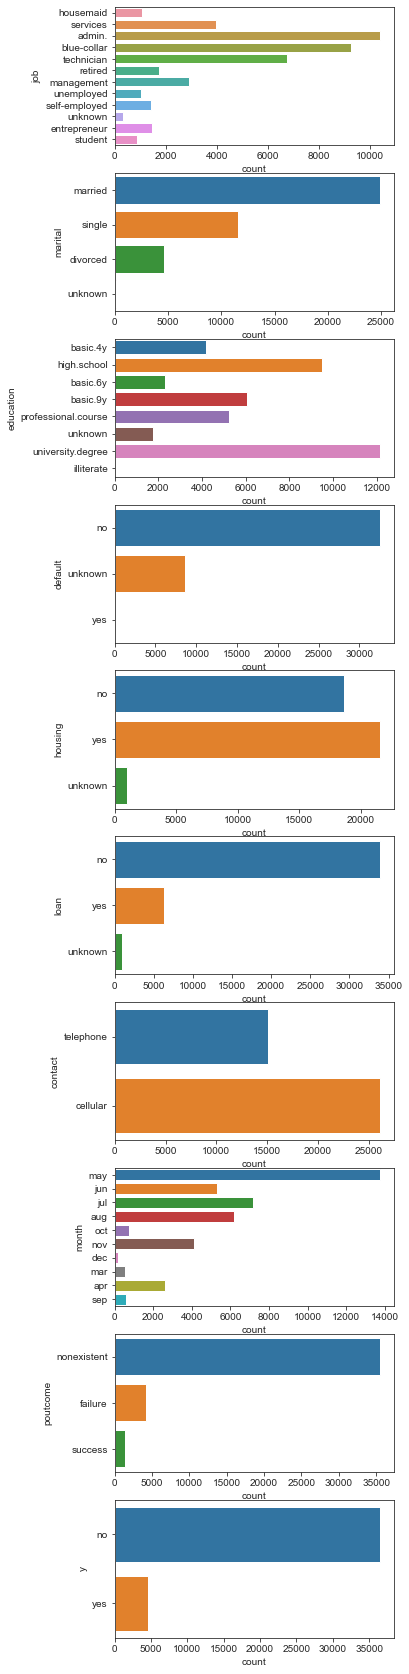

In [74]:
cat = ["job", "marital", "education", "default", "housing", 
       "loan", "contact", "month", "poutcome",'y']

fig, ax = plt.subplots(len(cat), 1, figsize=(5, 30))
for variable, subplot in zip(cat, ax.flatten()):
    sns.set_style("ticks")
    sns.countplot(y=data[variable], ax=subplot, label='medium')
    for label in subplot.get_xticklabels():
        label.set_rotation(0)
        plt.rcParams["font.family"] = "arial"

- Entre los clientes los trabajos que mas se presentan son administradores, 
- La mayoria de personas no tienen un prestamo personal o  un credito en mora. Sin embargo vemos un gran numero de personas que cuentan con un credito de vivienda.
- El mayo hay el mayor indice de contactos a clientes y en general estos se realizan mas por celular.
- Es claro que en la mayoria de casos no existe resultado de la campaña de marketing anterior y el nivel de succeso de las que si, es menor que el de fracaso.
- Podemos ver que hay mas clientes que no estan subscritos a un deposito.


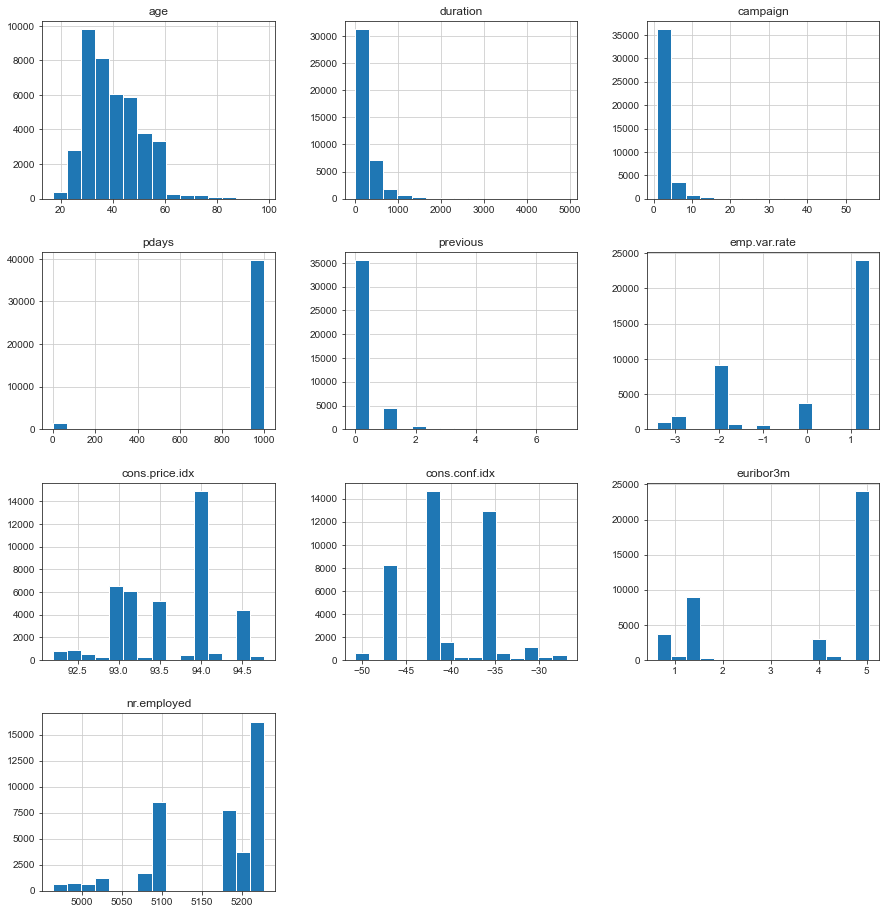

In [75]:
data[data.columns].hist(bins=15, figsize=(15, 16), layout=(4, 3));

<AxesSubplot:title={'center':'Trabajo y deposito'}>

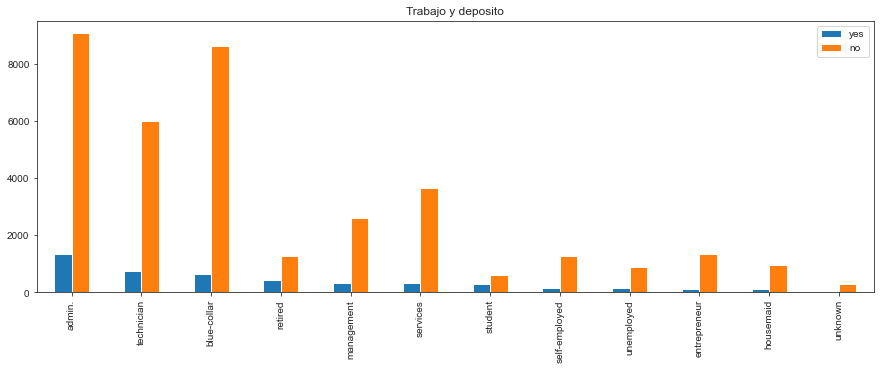

In [76]:
#job and deposit
j_df = pd.DataFrame()

j_df['yes'] = data[data['y'] == 'yes']['job'].value_counts()
j_df['no'] = data[data['y'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Trabajo y deposito')

El indice de subscripcion a deposito es muy baja sin embargo los administradores tienen mayor indice de aceptacion pero igualmente tiene el mayor indice de rechazo seguido por blue-collar y tecnicos.

<AxesSubplot:title={'center':'Estado sentimental y deposito'}>

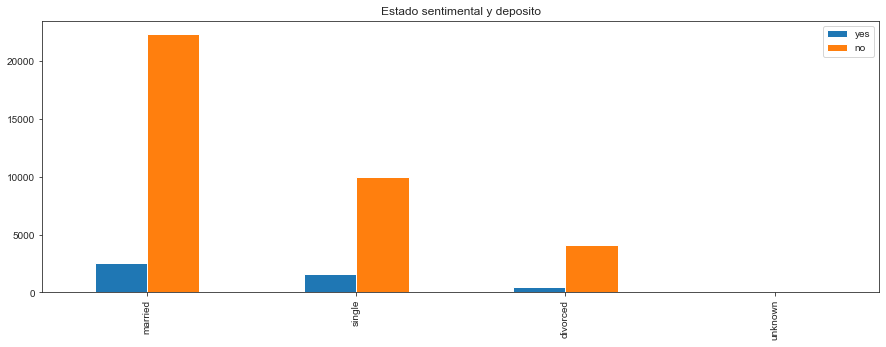

In [77]:
#marital status and deposit
j_df = pd.DataFrame()

j_df['yes'] = data[data['y'] == 'yes']['marital'].value_counts()
j_df['no'] = data[data['y'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Estado sentimental y deposito')

El indice de subscripcion a deposito es muy baja sin embargo los casados tienen mayor indice de aceptacion pero igualmente tiene el mayor indice de rechazo seguido por solteros y divorciados.

<AxesSubplot:title={'center':'Educacion y deposito'}>

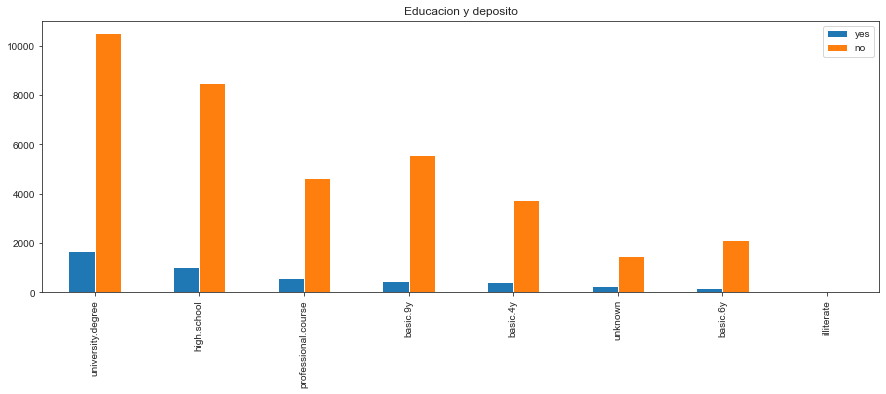

In [78]:
#education and deposit
j_df = pd.DataFrame()

j_df['yes'] = data[data['y'] == 'yes']['education'].value_counts()
j_df['no'] = data[data['y'] == 'no']['education'].value_counts()

j_df.plot.bar(title = 'Educacion y deposito')


El indice de subscripcion a deposito es muy baja sin embargo los universitarios tienen mayor indice de aceptacion pero igualmente tiene el mayor indice de rechazo seguido por high school y basic.

<AxesSubplot:title={'center':'Tipo de contacto y deposit'}>

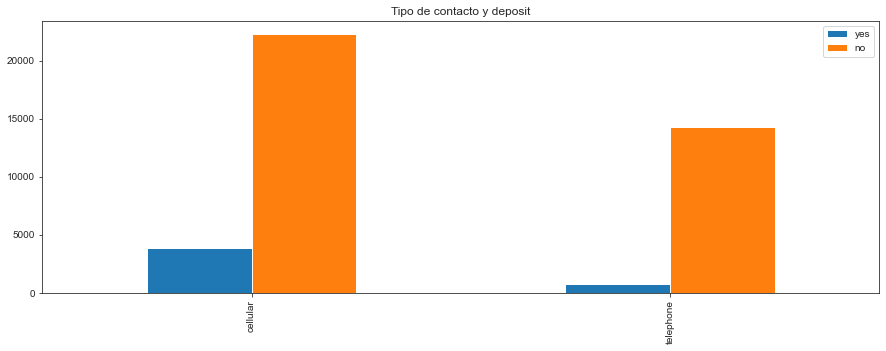

In [79]:
#type of contact and deposit
j_df = pd.DataFrame()

j_df['yes'] = data[data['y'] == 'yes']['contact'].value_counts()
j_df['no'] = data[data['y'] == 'no']['contact'].value_counts()

j_df.plot.bar(title = 'Tipo de contacto y deposit')

In [80]:
#age and deposit

a_df = pd.DataFrame()
a_df['age_yes'] = (data[data['y'] == 'yes'][['y','age']].describe())['age']
a_df['age_no'] = (data[data['y'] == 'no'][['y','age']].describe())['age']

a_df

,age_yes,age_no
count,4640.000000,36548.000000
mean,40.913147,39.911185
std,13.837476,9.898132
min,17.000000,17.000000
25%,31.000000,32.000000
50%,37.000000,38.000000
75%,50.000000,47.000000
max,98.000000,95.000000


 La media de edad de clientes que aceptaron subscribirse al deposito es de $40$ años y la edad maxima es de $98$ años. 

<AxesSubplot:title={'center':'Estadisticas de edad y deposito'}>

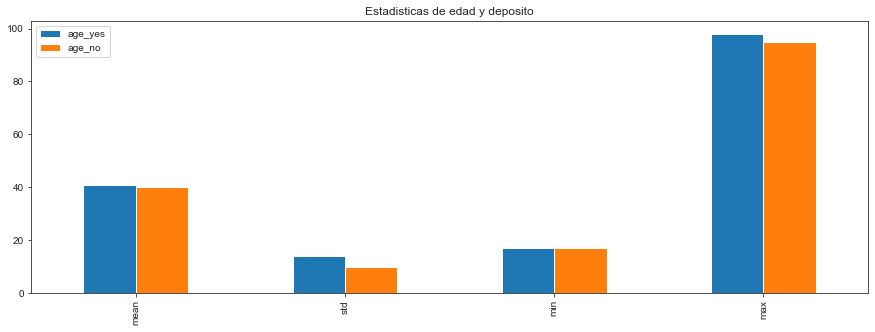

In [81]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Estadisticas de edad y deposito')

Podemos ver que los percentiles de aceptacion y rechazo son bastante cercanos sin embargo se tiene mayor rechazo en la mayoria

<AxesSubplot:title={'center':'Número de contactos realizados durante esta campaña y estadísticas de depósito'}>

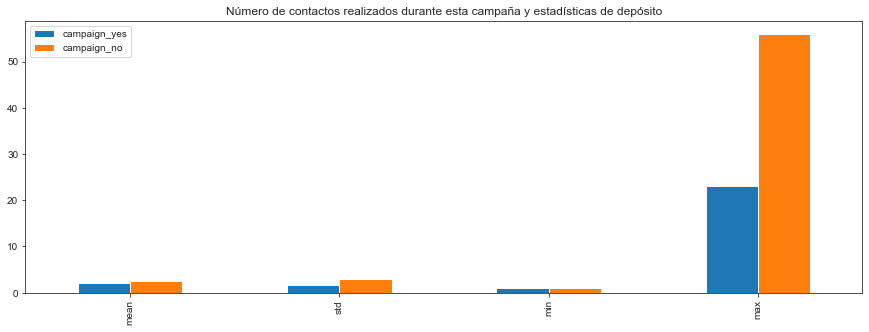

In [82]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Número de contactos realizados durante esta campaña y estadísticas de depósito')

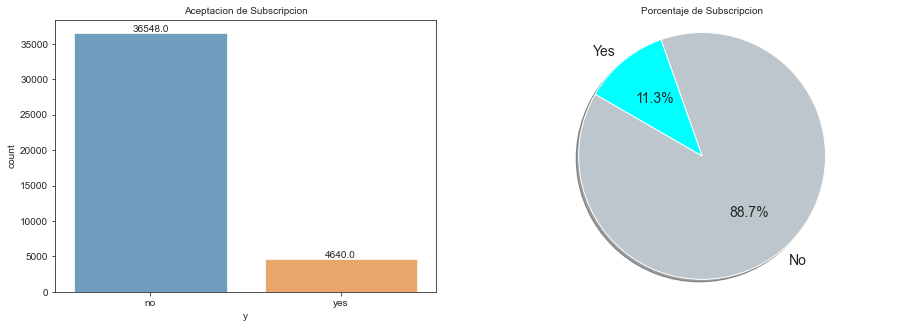

In [83]:
#The number of Subscribes users - Binary Yes/No, Checking balanced Dataset
plt.rcParams['figure.figsize']=15,5
plt.subplot(121)
plt.title('Aceptacion de Subscripcion', fontsize=10)
s = sns.countplot(x="y", data=data, alpha=0.7)
for p in s.patches:
    s.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 4), 
                textcoords = 'offset points')


ax = plt.subplot(122)
mush_classpie = data['y'].value_counts()
mush_size = mush_classpie.values.tolist()
mush_types = mush_classpie.axes[0].tolist()
mush_labels = 'No', 'Yes'
colors = ['#BCC6CC', '#00FFFF']
plt.title('Porcentaje de Subscripcion', fontsize=10)
patches, texts, autotexts = plt.pie(mush_size, labels=mush_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')  
plt.show()

Como habiamos visto anteriormente es mayor la cantidad de rechazo de la suscripcion, en total un $77.4%$ mayor a la aceptacion.

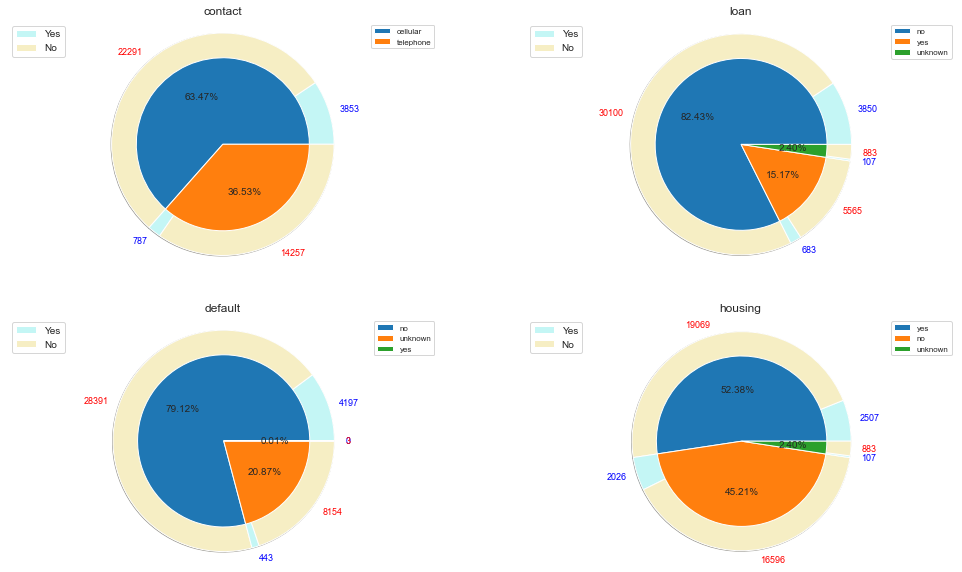

In [161]:
f, axes = plt.subplots(4,1, figsize=(17,10), sharey = True) 
num_col = ['contact', 'loan', 'default', 'housing']

for j,col in enumerate(num_col):
    cols = data[col].value_counts()
    pop_size = cols.values.tolist()
    pop_types = cols.axes[0].tolist()
    poisonous_pop = [] 
    edible_pop = []   
    for pop in pop_types: 
        size = len(data[data[col] == pop].index)
        edibles = len(data[(data[col] == pop) & (data['y'] == 'yes')].index)
        edible_pop.append(edibles)
        poisonous_pop.append(size-edibles)
    combine_ed_poi = []
    for i in range(0,len(edible_pop)):
        combine_ed_poi.append(edible_pop[i])
        combine_ed_poi.append(poisonous_pop[i])

    #Double pie chart.
    plt.subplot(2,2,j+1)
    plt.title(col)
    #Outer Pie Chart
    patches1, texts1 = plt.pie(combine_ed_poi,radius = 4.5,labels= combine_ed_poi,
                                    colors=['#C4F6F5','#F6EEC4'], shadow=True, labeldistance= 1.1)
    for i in range(0,len(texts1)):
        if(i%2==0):
            texts1[i].set_color('blue')
        else:
            texts1[i].set_color('red')
    for aut in texts1:
        aut.set_fontsize(9)
    #Inner Pie Chart
    patches2, texts2, autotexts2 = plt.pie(pop_size, radius = 3.5,
            autopct='%1.2f%%', shadow=True, labeldistance= 4.2)
    for aut in autotexts2:
        aut.set_fontsize(10)
        aut.set_horizontalalignment('center')
    #Set 2 Legends to the plot.
    first_legend   = plt.legend(patches1, ['Yes','No'], loc="upper left", fontsize=10)
    second_ledgend = plt.legend(patches2, pop_types, loc="best",fontsize=8)
    plt.gca().add_artist(first_legend)
    plt.axis('equal')
plt.show()

In [168]:
def absolute_value(val,month):
    a = round(val*sum(data[data['month']==month].y.value_counts())/100,0)
    return a

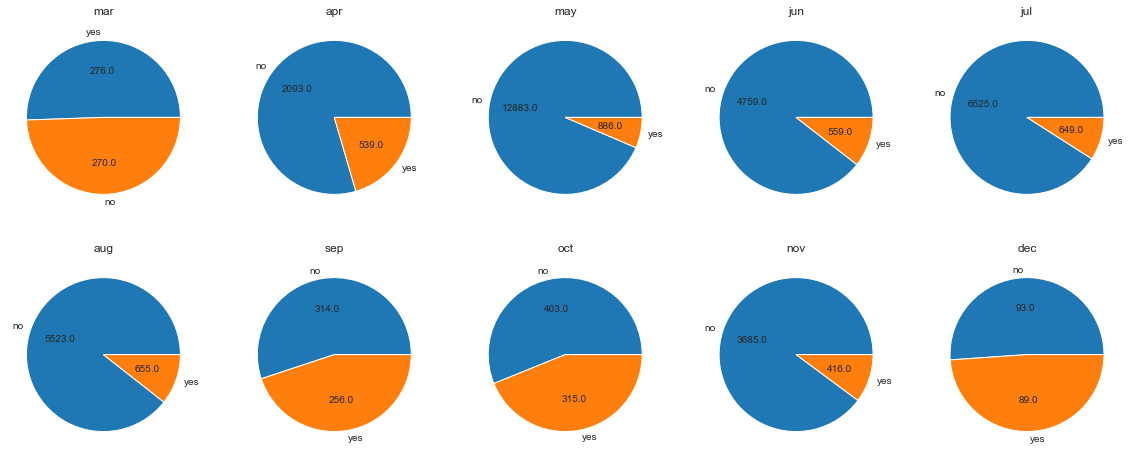

In [169]:
fig, axs = plt.subplots(2,5,figsize=(20,8))
plot_dict=dict(zip(range(0,10),[axs[0,0],axs[0,1],axs[0,2],axs[0,3],axs[0,4],
                     axs[1,0],axs[1,1], axs[1,2], axs[1,3], axs[1,4]]))

#enumerate returns tuple of month and a number(idx)
for idx, month in enumerate(['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']):
    #gets axes from dict and plots on it
    plot_dict.get(idx).pie(data[data['month']==month].y.value_counts(),
             labels=data[data['month']==month].y.value_counts().index, autopct=lambda val: absolute_value(val,month))
    plot_dict.get(idx).set_title(month)

- Tener en cuenta el tiempo de la empresa (Marzo o diciembre es el más efectivo)
- Aumentar el tiempo de contacto con los clientes (quizás de una manera diferente formulando el objetivo de la empresa). Es posible utilizar otros medios de comunicación.
- Centrarse en categorías específicas. El modelo muestra que los estudiantes y adultos mayores responden mejor a la propuesta.
- Es imperativo formar grupos objetivo basados en categorías socioeconómicas. La edad, el nivel de ingresos (no siempre alto), la profesión pueden determinar con precisión el perfil de marketing de un cliente potencial.
- Dados estos factores, se recomienda concentrarse en aquellos grupos de consumidores que son potencialmente más prometedores.

# Predicting model

In [176]:
data['y'] = data['y'].replace({'yes':1,'no':0})
data['education'] = data['education'].replace({'basic.4y':0,'basic.6y':1,'basic.9y':2,'high.school':3,'illiterate':4,'professional.course':5, 'university.degree':6,'unknown':7})
data['marital'] = data['marital'].replace({'divorced':0, 'married':1,'single':2, 'unknown':3})
data['job'] = data['job'].replace({'basic.4y': 0, 'basic.6y':1, 'basic.9y':2, 'high.school':3, 'illiterate':4,'professional.course':5, 'university.degree':6,'unknown':7})
data['default'] = data['default'].replace({'yes':1,'no':0,'unknown':3})
data['housing'] = data['housing'].replace({'yes':1,'no':0,'unknown':3})
data['loan'] = data['loan'].replace({'yes':1,'no':0,'unknown':3})
data['poutcome'] = data['poutcome'].replace({'success':1,'failure':0,'nonexistent':3})
data['contact'] = data['contact'].replace({'telephone':0,'cellular':1})
data['month'] = data['month'].replace({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'mar':3, 'apr':4,'sep':9})
data['day_of_week'] = data['day_of_week'].replace({'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5})



<AxesSubplot:>

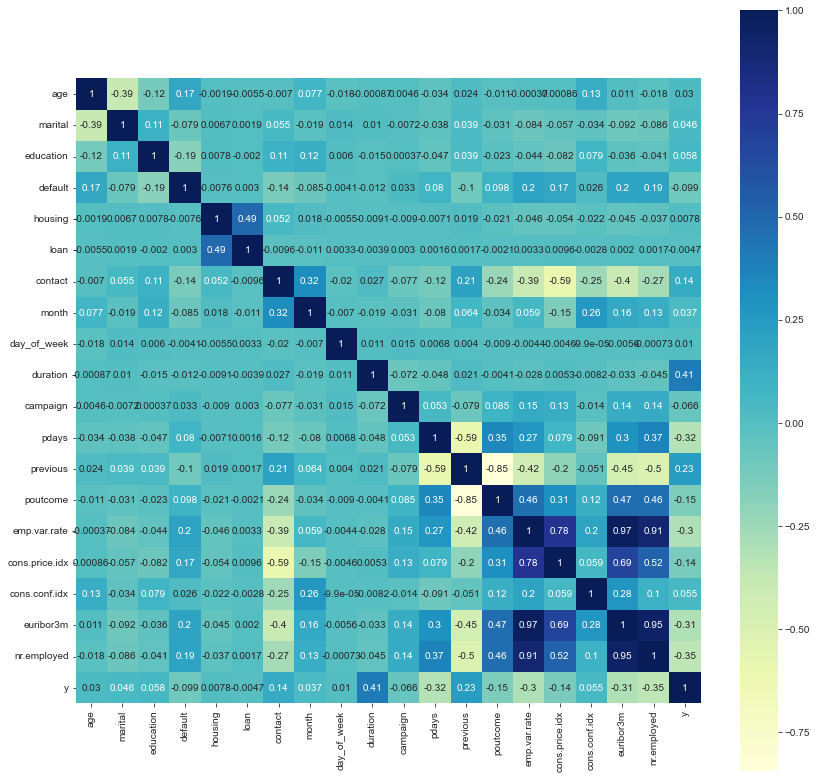

In [177]:
corr = data.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,square=True,annot=True, cmap = "YlGnBu")

In [179]:
corr['y'].sort_values(axis=0, ascending=True)

nr.employed      -0.354678
pdays            -0.324914
euribor3m        -0.307771
emp.var.rate     -0.298334
poutcome         -0.148578
cons.price.idx   -0.136211
default          -0.099315
campaign         -0.066357
loan             -0.004691
housing           0.007771
day_of_week       0.010051
age               0.030399
month             0.037187
marital           0.046203
cons.conf.idx     0.054878
education         0.057799
contact           0.144773
previous          0.230181
duration          0.405274
y                 1.000000
Name: y, dtype: float64

In [181]:
data.drop(columns=['nr.employed','pdays','euribor3m','emp.var.rate','cons.price.idx','contact','month','campaign', 'day_of_week'], axis=0, inplace=True)

In [182]:
X = data.drop(columns = ['y'])
y = data[['y']]

In [183]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [193]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

def print_scores(model, labels, pred):
    # Confusion matrix
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)    
    recall = round(recall_score(labels, pred), 3)
    f1 = round(f1_score(labels, pred), 3)
    
    cm = confusion_matrix(labels, pred)
    df = pd.DataFrame(cm)
    
    labels = [f"TP: {df[0][0]} ",f"TN: {df[1][1]} ",f"FP: {df[1][0]} ",f"FN: {df[0][1]} "]
    labels = np.asarray(labels).reshape(2,2)
    
    f, ax = plt.subplots(figsize=(6,5))
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', ax=ax)    
    print(f"{model}:: Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, f1_score: {f1}")

def print_cv_result(results):
    print(f"Best Params : {results.best_params_}\n")
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print(f'{round(mean, 3)} (+/-{round(std * 2, 3)}) for {params}')


SVM Time:41136.159999999996
SVM:: Accuracy: 0.91, Precision: 0.642, Recall: 0.441, f1_score: 0.523


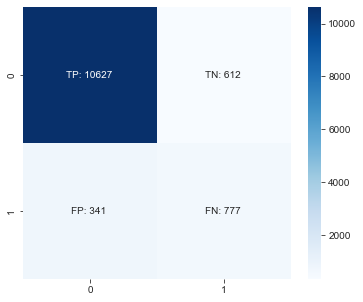

In [194]:
from sklearn.svm import SVC
from time import time

start = time()
svc = SVC(kernel = "rbf", C=10)
svc.fit(X_train,y_train)
y_pred_svm = svc.predict(X_test)
end = time()
print(f"SVM Time:{round((end - start), 5) * 1000}")
print_scores("SVM", y_test, y_pred_svm)

LGR:: Accuracy: 0.909, Precision: 0.658, Recall: 0.401, f1_score: 0.498


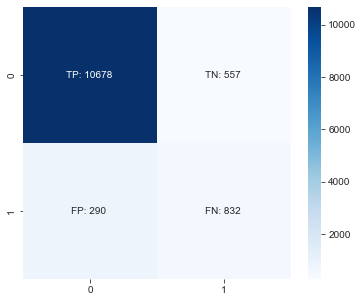

In [195]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_pred_lgr = lgr.predict(X_test)
print_scores("LGR", y_test, y_pred_lgr)

Rfc:: Accuracy: 0.913, Precision: 0.651, Recall: 0.481, f1_score: 0.553


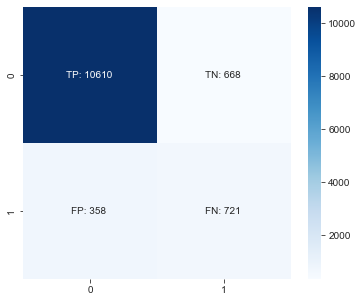

In [198]:
Rfc = RandomForestClassifier()
Rfc.fit(X_train, y_train)
y_pred_rfc = Rfc.predict(X_test)
print_scores("Rfc", y_test, y_pred_rfc)

KNC:: Accuracy: 0.901, Precision: 0.588, Recall: 0.394, f1_score: 0.472


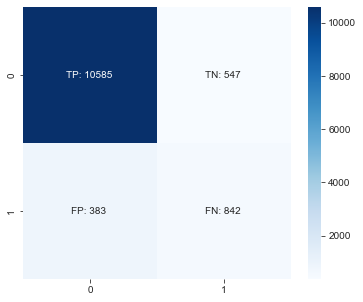

In [199]:
KNC = KNeighborsClassifier()
KNC.fit(X_train, y_train)
y_pred_KNC = KNC.predict(X_test)
print_scores("KNC", y_test, y_pred_KNC)

KNC:: Accuracy: 0.888, Precision: 0.501, Recall: 0.499, f1_score: 0.5


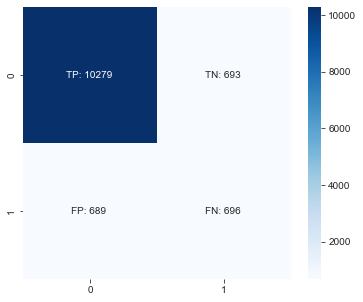

In [200]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
y_pred_DTC = DTC.predict(X_test)
print_scores("KNC", y_test, y_pred_DTC)

KNC:: Accuracy: 0.904, Precision: 0.608, Recall: 0.407, f1_score: 0.488


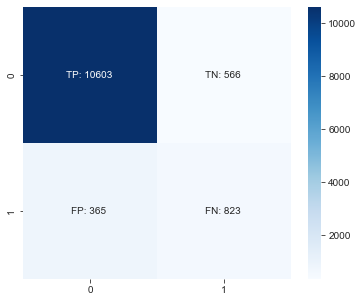

In [201]:
BC = BaggingClassifier()
BC.fit(X_train, y_train)
y_pred_BC = BC.predict(X_test)
print_scores("KNC", y_test, y_pred_BC)

KNC:: Accuracy: 0.901, Precision: 0.588, Recall: 0.394, f1_score: 0.472


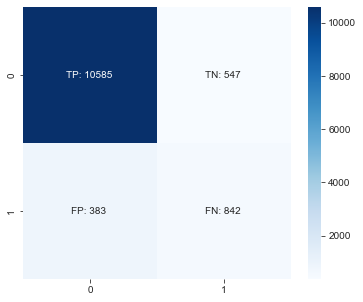

In [204]:
from sklearn.linear_model import SGDClassifier
SGDC = SGDClassifier()
SGDC.fit(X_train, y_train)
y_pred_SGDC = KNC.predict(X_test)
print_scores("KNC", y_test, y_pred_SGDC)

##### El modelo con mejor precision es LogisticRegression con Accuracy de 0.909